In [123]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import matplotlib.pyplot as plt
#import rex
from collections import OrderedDict
import seaborn as sns
import matplotlib as mt

In [200]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated.csv', encoding="utf-8")

In [201]:
data.head()

,Unnamed: 0,Num,date,pattern,pattern_name,msecurity,colon_count,end_count,end,lower,start,upper,low_x,low_y,upper_x,upper_y
0,0,12,11-04-2019,"[{'end_point': 1470182400000, 'lower_line': [[...",bullish_channel,364,4,1,1470182400000,"[[1460332800000, 1464220800000, 1466985600000...",1460332800000,"[[1460332800000, 1461801600000, 1465171200000...","1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...","1460332800000, 1461801600000, 1465171200000, ...","66.21418536795582, 67.29657235521013, 69.46134..."
1,1,14,11-04-2019,"[{'end_point': 1501113600000, 'lower_line': [[...",bullish_channel,403,4,1,1501113600000,"[[1485993600000, 1492041600000, 1494460800000...",1485993600000,"[[1485993600000, 1489968000000, 1493942400000...","1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...","1485993600000, 1489968000000, 1493942400000, ...","174.06728653342793, 184.10087736129933, 194.78..."
2,2,15,11-04-2019,"[{'end_point': 1518134400000, 'lower_line': [[...",bullish_channel,223,4,1,1518134400000,"[[1510704000000, 1514419200000, 1516924800000...",1510704000000,"[[1510704000000, 1511308800000, 1515628800000...","1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...","1510704000000, 1511308800000, 1515628800000, ...","71.03978366799774, 71.43, 74.00542779121506, 7..."
3,3,18,11-04-2019,"[{'end_point': 1503964800000, 'lower_line': [[...",bullish_channel,339,4,1,1503964800000,"[[1490140800000, 1495065600000, 1497225600000...",1490140800000,"[[1490140800000, 1494201600000, 1496620800000...","1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...","1490140800000, 1494201600000, 1496620800000, ...","53.60673631513863, 57.57902584881698, 59.93757..."
4,4,27,11-04-2019,"[{'end_point': 1499299200000, 'lower_line': [[...",bullish_channel,321,4,1,1499299200000,"[[1489536000000, 1492041600000, 1493337600000...",1489536000000,"[[1489536000000, 1491350400000, 1493251200000...","1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...","1489536000000, 1491350400000, 1493251200000, ...","54.32915560501841, 56.831001874596325, 59.3328..."


In [202]:
data['x']=data['low_x']+","+data['upper_x']
data['y']=data['low_y']+","+data['upper_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [203]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][0]
data2["first_y"] = data2["y"][0]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
#data3['comma_count'] = data.x.str.count(',')
#data3['comma_count'][0]

In [204]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
#data3["x_9"] = newx[9]
#data3["xx_1"] = newx[10]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
#data3["y_9"] = pd.to_numeric(newy[9])
#data3["yy_1"] = pd.to_numeric(newy[10])


In [205]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")
data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)

In [206]:
data3

,first_x,first_y,xx,Value
0,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_0,1.46033e+12
4,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_0,1.46033e+12
5,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_1,1.46422e+12
9,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_1,1.46422e+12
14,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_2,1.46699e+12
10,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_2,1.46699e+12
15,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_3,1.47018e+12
19,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_3,1.47018e+12
24,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_4,1.46033e+12
20,"1460332800000, 1464220800000, 1466985600000, ...","61.633554481706994, 64.38115221858331, 66.1296...",x_4,1.46033e+12


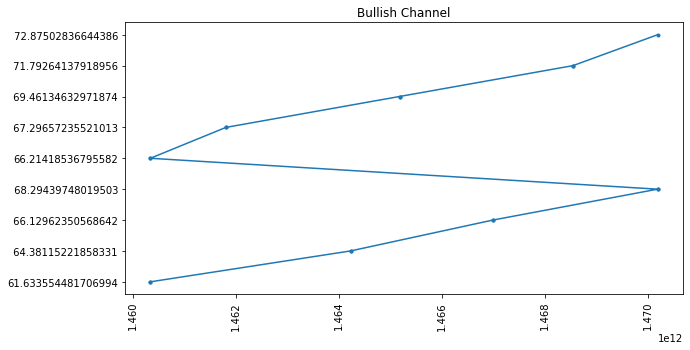

In [207]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:17].tolist()
graph_y = data3['Value'][18:35].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Bullish Channel")
plt.plot(graph_x,graph_y,marker='.')
plt.show()

In [208]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated.csv', encoding="utf-8")

In [209]:
data['x']=data['low_x']+","+data['upper_x']
data['y']=data['low_y']+","+data['upper_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [210]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][1]
data2["first_y"] = data2["y"][1]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [211]:
newx = data3["first_x"].str.split(",", n =10, expand = True)
newy = data3["first_y"].str.split(",", n =10, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3["x_9"] = pd.to_numeric(newx[9])
data3["xx_1"] = pd.to_numeric(newx[10])
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
data3["y_9"] = newy[9]
data3["yy_1"] = newy[10]

In [212]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_0,1.48599e+12
4,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_0,1.48599e+12
5,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_1,1.49204e+12
9,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_1,1.49204e+12
14,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_2,1.49446e+12
10,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_2,1.49446e+12
15,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_3,1.4993e+12
19,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_3,1.4993e+12
20,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_4,1.50111e+12
24,"1485993600000, 1492041600000, 1494460800000, ...","165.11900376564927, 180.97855055809111, 187.12...",x_4,1.50111e+12


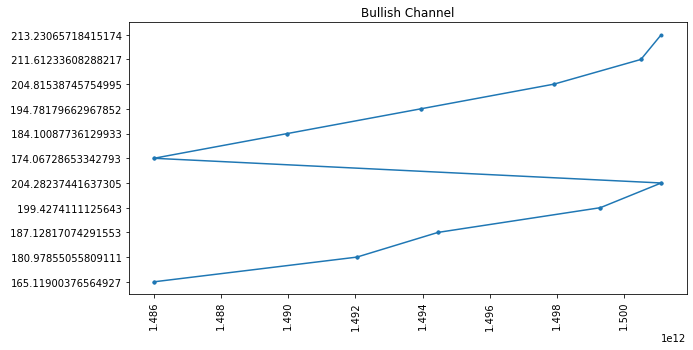

In [213]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:21].tolist()
graph_y = data3['Value'][22:43].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Bullish Channel")
plt.plot(graph_x,graph_y,marker='.')
plt.show()

In [214]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated.csv', encoding="utf-8")
data['x']=data['low_x']+","+data['upper_x']
data['y']=data['low_y']+","+data['upper_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][2]
data2["first_y"] = data2["y"][2]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])

In [215]:
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [216]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
#data3["x_9"] = pd.to_numeric(newx[9])
#data3["xx_10"] = pd.to_numeric(newx[10])
#data3["xx_11"] = pd.to_numeric(newx[11])
#data3["xx_12"] = pd.to_numeric(newx[12])
#data3["xx_13"] = pd.to_numeric(newx[13])
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
#data3["y_9"] = pd.to_numeric(newy[9])
#data3["yy_10"] = pd.to_numeric(newy[10])
#data3["yy_11"] = pd.to_numeric(newy[11])
#data3["yy_12"] = pd.to_numeric(newy[12])
#data3["yy_13"] = pd.to_numeric(newy[13])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_0,1.5107e+12
4,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_0,1.5107e+12
5,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_1,1.51442e+12
9,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_1,1.51442e+12
14,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_2,1.51692e+12
10,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_2,1.51692e+12
15,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_3,1.51813e+12
19,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_3,1.51813e+12
24,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_4,1.5107e+12
20,"1510704000000, 1514419200000, 1516924800000, ...","65.31355549572164, 67.57681022133485, 69.05963...",x_4,1.5107e+12


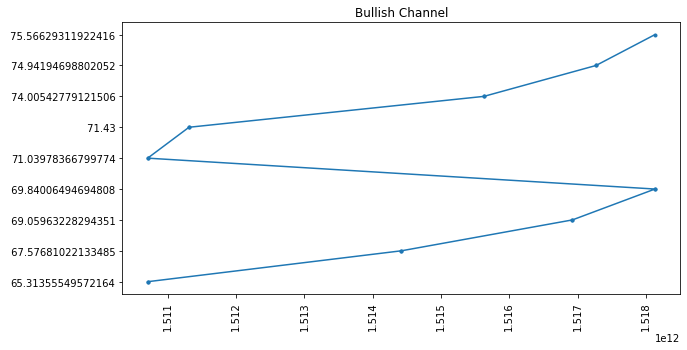

In [217]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:17].tolist()
graph_y = data3['Value'][18:35].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Bullish Channel")
plt.plot(graph_x,graph_y,marker='.')
plt.show()

In [218]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated.csv', encoding="utf-8")
data['x']=data['low_x']+","+data['upper_x']
data['y']=data['low_y']+","+data['upper_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][3]
data2["first_y"] = data2["y"][3]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [219]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
#data3["x_9"] = pd.to_numeric(newx[9])
#data3["xx_10"] = pd.to_numeric(newx[10])
#data3["xx_11"] = pd.to_numeric(newx[11])
#data3["xx_12"] = pd.to_numeric(newx[12])
#data3["xx_13"] = pd.to_numeric(newx[13])
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
#data3["y_9"] = pd.to_numeric(newy[9])
#data3["yy_10"] = pd.to_numeric(newy[10])
#data3["yy_11"] = pd.to_numeric(newy[11])
#data3["yy_12"] = pd.to_numeric(newy[12])
#data3["yy_13"] = pd.to_numeric(newy[13])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_0,1.49014e+12
4,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_0,1.49014e+12
5,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_1,1.49507e+12
9,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_1,1.49507e+12
14,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_2,1.49723e+12
10,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_2,1.49723e+12
15,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_3,1.50396e+12
19,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_3,1.50396e+12
24,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_4,1.49014e+12
20,"1490140800000, 1495065600000, 1497225600000, ...","51.54092485791185, 56.506286775009784, 58.4924...",x_4,1.49014e+12


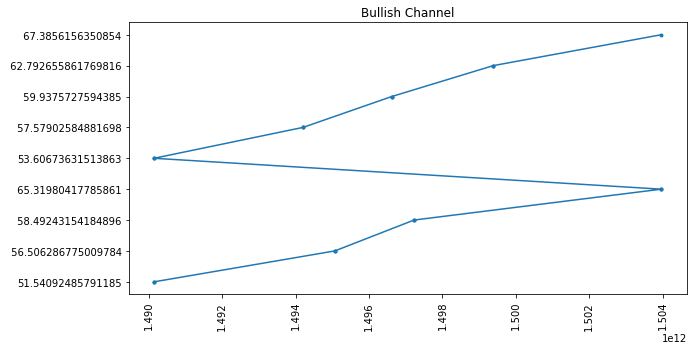

In [220]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:17].tolist()
graph_y = data3['Value'][18:35].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Bullish Channel")
plt.plot(graph_x,graph_y,marker='.')
plt.show()

In [221]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated.csv', encoding="utf-8")
data['x']=data['low_x']+","+data['upper_x']
data['y']=data['low_y']+","+data['upper_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Bullish_Channel\\Bullish_Channel_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][4]
data2["first_y"] = data2["y"][4]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [222]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
#data3["x_9"] = pd.to_numeric(newx[9])
#data3["xx_10"] = pd.to_numeric(newx[10])
#data3["xx_11"] = pd.to_numeric(newx[11])
#data3["xx_12"] = pd.to_numeric(newx[12])
#data3["xx_13"] = pd.to_numeric(newx[13])
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
#data3["y_9"] = pd.to_numeric(newy[9])
#data3["yy_10"] = pd.to_numeric(newy[10])
#data3["yy_11"] = pd.to_numeric(newy[11])
#data3["yy_12"] = pd.to_numeric(newy[12])
#data3["yy_13"] = pd.to_numeric(newy[13])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_0,1.48954e+12
4,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_0,1.48954e+12
5,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_1,1.49204e+12
9,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_1,1.49204e+12
14,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_2,1.49334e+12
10,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_2,1.49334e+12
15,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_3,1.4993e+12
19,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_3,1.4993e+12
24,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_4,1.48954e+12
20,"1489536000000, 1492041600000, 1493337600000, ...","52.281172330768754, 55.78375710817784, 57.4516...",x_4,1.48954e+12


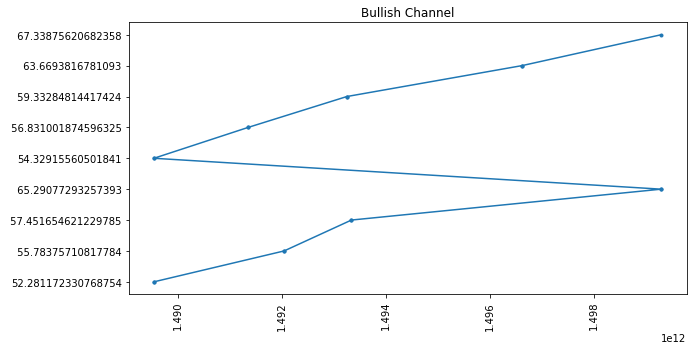

In [223]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:17].tolist()
graph_y = data3['Value'][18:35].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Bullish Channel")
plt.plot(graph_x,graph_y,marker='.')
plt.show()